In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
from supermarket import SupermarketEnv
import matplotlib.pyplot as plt

c:\Users\P0sitive\anaconda3\envs\py39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define net
class SimulatedEnv(nn.Module):
    def __init__(self, input_size: int, output_size: int):
        super().__init__()
        self.hidden_size = 128
        self.l1 = nn.Linear(input_size, self.hidden_size)
        self.l2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.l3 = nn.Linear(self.hidden_size, output_size)
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()
    
    def forward(self, x):
        x = self.l1(x)
        x = self.sig(x)
        x = self.l3(x)
        x = self.sig(x)
        return x

# Agent net
class AgentNet(nn.Module):
    def __init__(self, input_size: int, output_size: int):
        super().__init__()
        self.hidden_size = 64
        self.l1 = nn.Linear(input_size, self.hidden_size)
        self.l2 = nn.Linear(self.hidden_size, output_size)
        self.relu = nn.ReLU(True)
    
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        return x

In [3]:
# env setup
num_goods = 10
num_users = 10

# 创建超市环境
env = SupermarketEnv()
env.create_goods_list(num_goods, num_users)

# 显示每个商品的客户函数列表
# for i in range(len(env.goodsList)):
#     print("Goods", i, "function list:")
#     for j in range(len(env.goodsList[i].functionListForCustomers)):
#         print("\t", j, env.goodsList[i].functionListForCustomers[j])

# 计算总收入并显示
env.compute_revenue_list([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
total_revenue = env.compute_TR()
print(env.revenueList)
print("Total revenue:", total_revenue)

env.compute_revenue_list([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
total_revenue = env.compute_TR()
print(env.revenueList)
print("Total revenue:", total_revenue)

env.compute_revenue_list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
total_revenue = env.compute_TR()
print(env.revenueList)
print("Total revenue:", total_revenue)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total revenue: 0
[250, 250, 250, 250, 250, 250, 250, 250, 250, 250]
Total revenue: 2500
[51, 34, 85, 102, 17, 68, 34, 17, 68, 17]
Total revenue: 493


In [4]:
# hyperparameters
learning_rate = 1e-5
net = SimulatedEnv(10, 10)
optimizer = torch.optim.Adam(net.parameters(), learning_rate)
crit = nn.MSELoss() # Loss Funct
shape = (1000, 10)
rand_data = torch.rand(shape)

In [5]:
# Flow
num_epoch = 5000
net.train()
losses = []
for i in range(num_epoch):
    rand_x = np.random.uniform(low=0, high=10, size=10)
        
    y_pred = net(torch.Tensor(rand_x))
    env.compute_revenue_list(rand_x)
    env.compute_TR()
    y_real = torch.Tensor(env.revenueList)
    y_real = torch.nn.functional.normalize(y_real, dim=0)
    
    loss = crit(y_pred, y_real)
    print(f"round: {i},pred:{y_pred},real:{y_real}")
    print(f"loss: {loss}")
    losses.append(loss.detach())
    loss.backward()
    optimizer.step()

round: 0,pred:tensor([0.6773, 0.4061, 0.4549, 0.6889, 0.6243, 0.5104, 0.3843, 0.3977, 0.5505,
        0.4077], grad_fn=<SigmoidBackward0>),real:tensor([0.4639, 0.0000, 0.1813, 0.4779, 0.1519, 0.1486, 0.0000, 0.0955, 0.5019,
        0.4661])
loss: 0.09286455065011978
round: 1,pred:tensor([0.6665, 0.4609, 0.4964, 0.6253, 0.6288, 0.4878, 0.4170, 0.4272, 0.5675,
        0.3670], grad_fn=<SigmoidBackward0>),real:tensor([0.0000, 0.0000, 0.1579, 0.0000, 0.2946, 0.4286, 0.5774, 0.0000, 0.3257,
        0.5148])
loss: 0.15659253299236298
round: 2,pred:tensor([0.7433, 0.4317, 0.4946, 0.6439, 0.6625, 0.5046, 0.3636, 0.4273, 0.5310,
        0.4266], grad_fn=<SigmoidBackward0>),real:tensor([0.0039, 0.0000, 0.0000, 0.5558, 0.3701, 0.5257, 0.1746, 0.4694, 0.0000,
        0.1643])
loss: 0.1459561139345169
round: 3,pred:tensor([0.6208, 0.4344, 0.4589, 0.6980, 0.6498, 0.4831, 0.4202, 0.4118, 0.5434,
        0.3896], grad_fn=<SigmoidBackward0>),real:tensor([0.0000, 0.1387, 0.3895, 0.3492, 0.0000, 0.3909, 

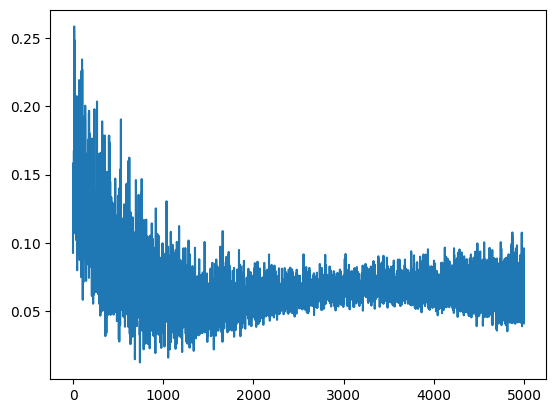

In [6]:
plt.plot(losses)

In [12]:
# Train AgentNet
# Instantiation 
learning_rate = 1e-3
agentnet = AgentNet(10, 10)
agentOptimizer = torch.optim.Adam(agentnet.parameters(), learning_rate)
shape = (1, 10)
rand_data = torch.rand(shape)
rand_x = torch.rand(shape) # features
rand_y = torch.rand(shape) # label
# Loss
def SumSquare(x):
    return -torch.sum(x)

In [13]:
# Flow
num_step = 5000
agentnet.train()
net.eval()
rev = []
for i in range(num_step):
    price = agentnet(rand_x)
    revenue = net(price)
    ss = SumSquare(revenue)
    print(ss)
    rev.append(-ss.detach())    
    ss.backward()
    agentOptimizer.step()

tensor(-1.0830, grad_fn=<NegBackward0>)
tensor(-1.0847, grad_fn=<NegBackward0>)
tensor(-1.0862, grad_fn=<NegBackward0>)
tensor(-1.0878, grad_fn=<NegBackward0>)
tensor(-1.0893, grad_fn=<NegBackward0>)
tensor(-1.0909, grad_fn=<NegBackward0>)
tensor(-1.0925, grad_fn=<NegBackward0>)
tensor(-1.0940, grad_fn=<NegBackward0>)
tensor(-1.0956, grad_fn=<NegBackward0>)
tensor(-1.0972, grad_fn=<NegBackward0>)
tensor(-1.0988, grad_fn=<NegBackward0>)
tensor(-1.1005, grad_fn=<NegBackward0>)
tensor(-1.1021, grad_fn=<NegBackward0>)
tensor(-1.1038, grad_fn=<NegBackward0>)
tensor(-1.1055, grad_fn=<NegBackward0>)
tensor(-1.1073, grad_fn=<NegBackward0>)
tensor(-1.1090, grad_fn=<NegBackward0>)
tensor(-1.1108, grad_fn=<NegBackward0>)
tensor(-1.1126, grad_fn=<NegBackward0>)
tensor(-1.1145, grad_fn=<NegBackward0>)
tensor(-1.1164, grad_fn=<NegBackward0>)
tensor(-1.1183, grad_fn=<NegBackward0>)
tensor(-1.1203, grad_fn=<NegBackward0>)
tensor(-1.1223, grad_fn=<NegBackward0>)
tensor(-1.1244, grad_fn=<NegBackward0>)


Text(0, 0.5, 'Revenue')

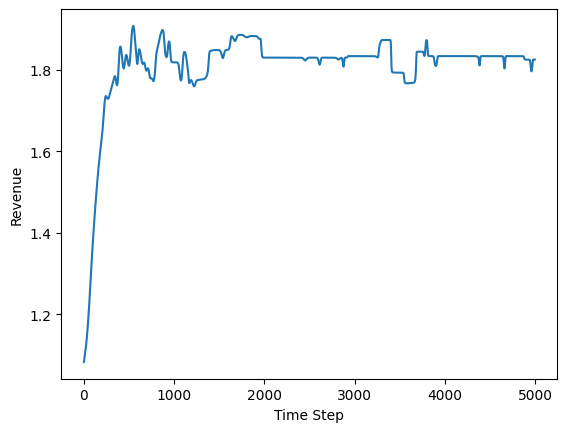

In [17]:
plt.plot(rev)
plt.xlabel("Time Step")
plt.ylabel("Revenue")